references:

 https://www.kaggle.com/jillanisofttech/house-sales-regression-r-score-97-5

https://www.kaggle.com/jillanisofttech/house-sales-regression-r-score-97-5

https://www.kaggle.com/codeblogger/machine-learning-14-different-regression


# Importing Libraries  **The code may not work correctly. Some models may be overfit. I put it as an example.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium  

# Data Reading and Preprocessing


In [2]:
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv') ##Reading data

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df['date'] = pd.to_datetime(df['date']) #Dropping date column bcz i won't gonna day and month and creating new year column
df['year'] = df['date'].dt.year
df = df.drop("date",axis=1)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


# Data Visualization

<AxesSubplot:xlabel='year', ylabel='price'>

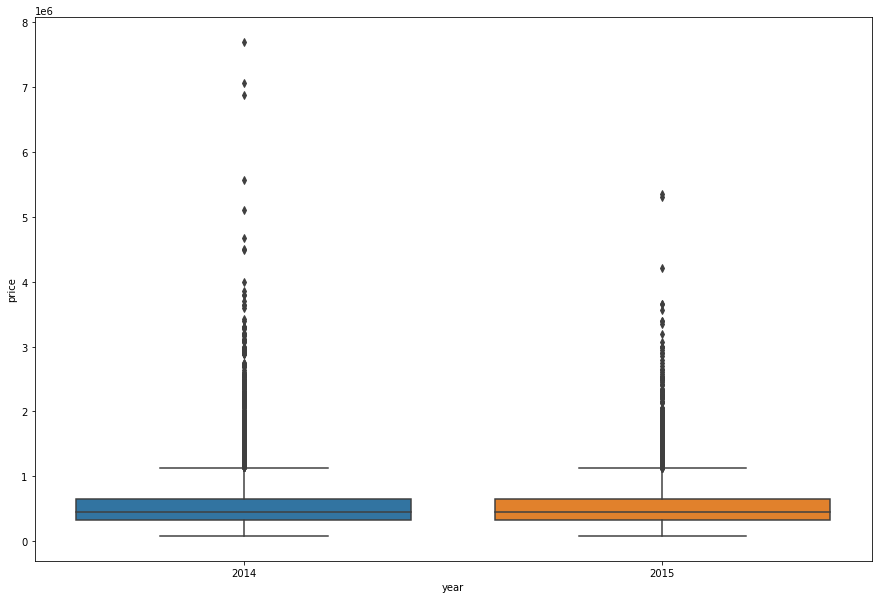

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(x="year", y="price", data=df)

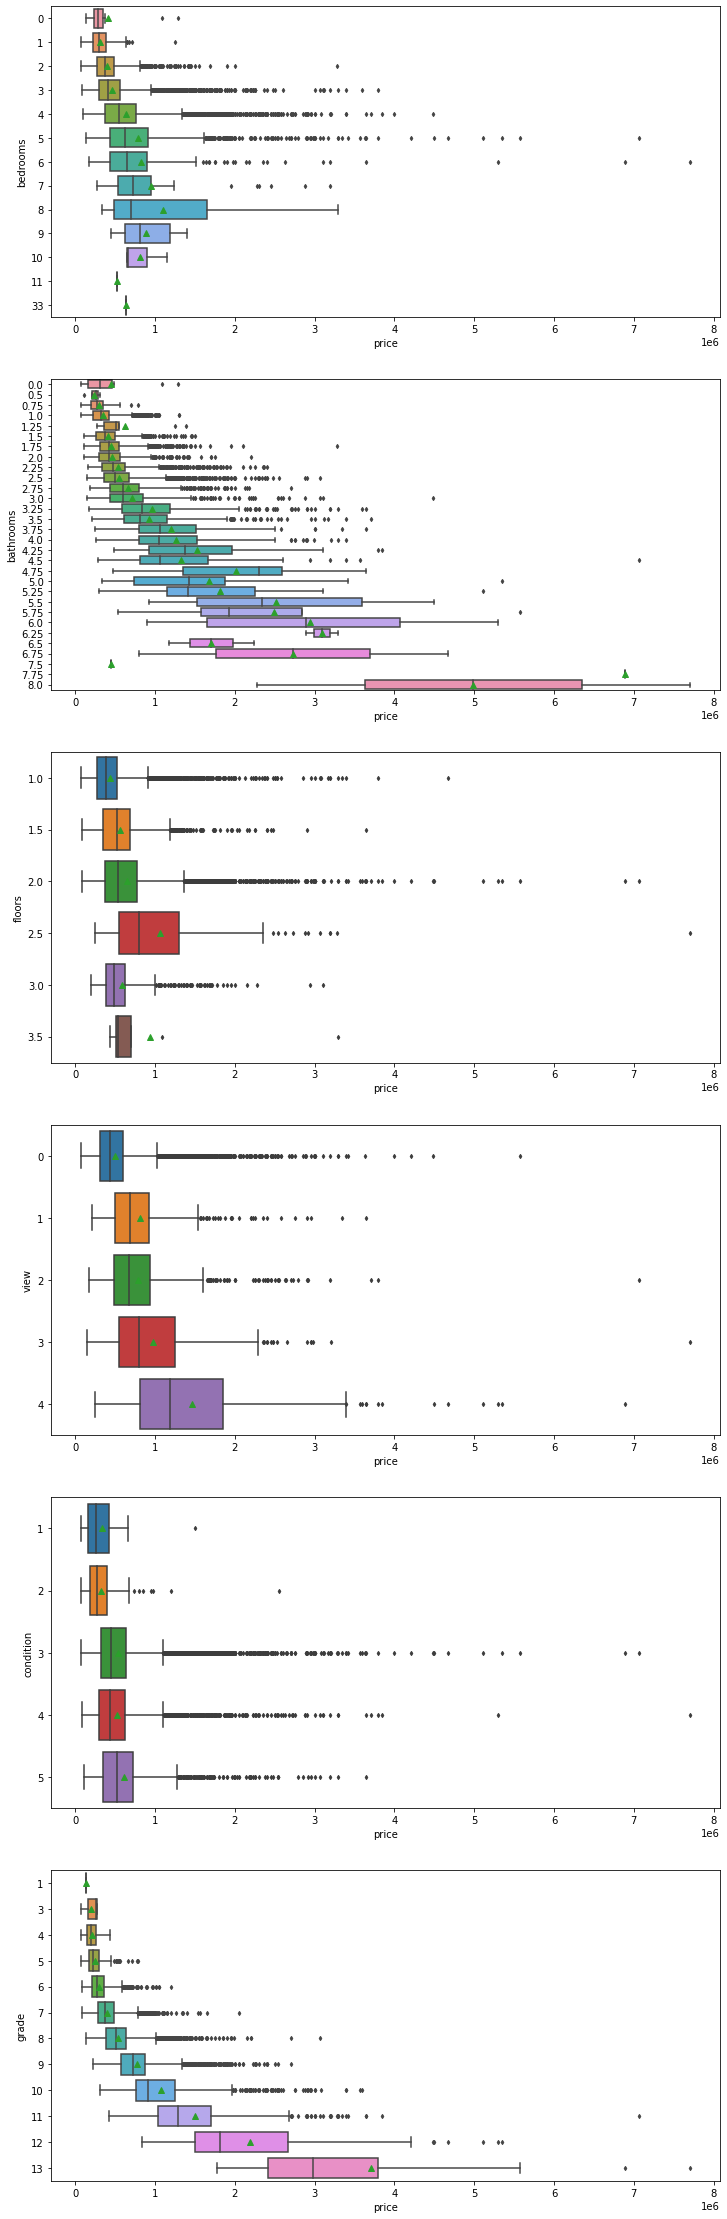

In [7]:
fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


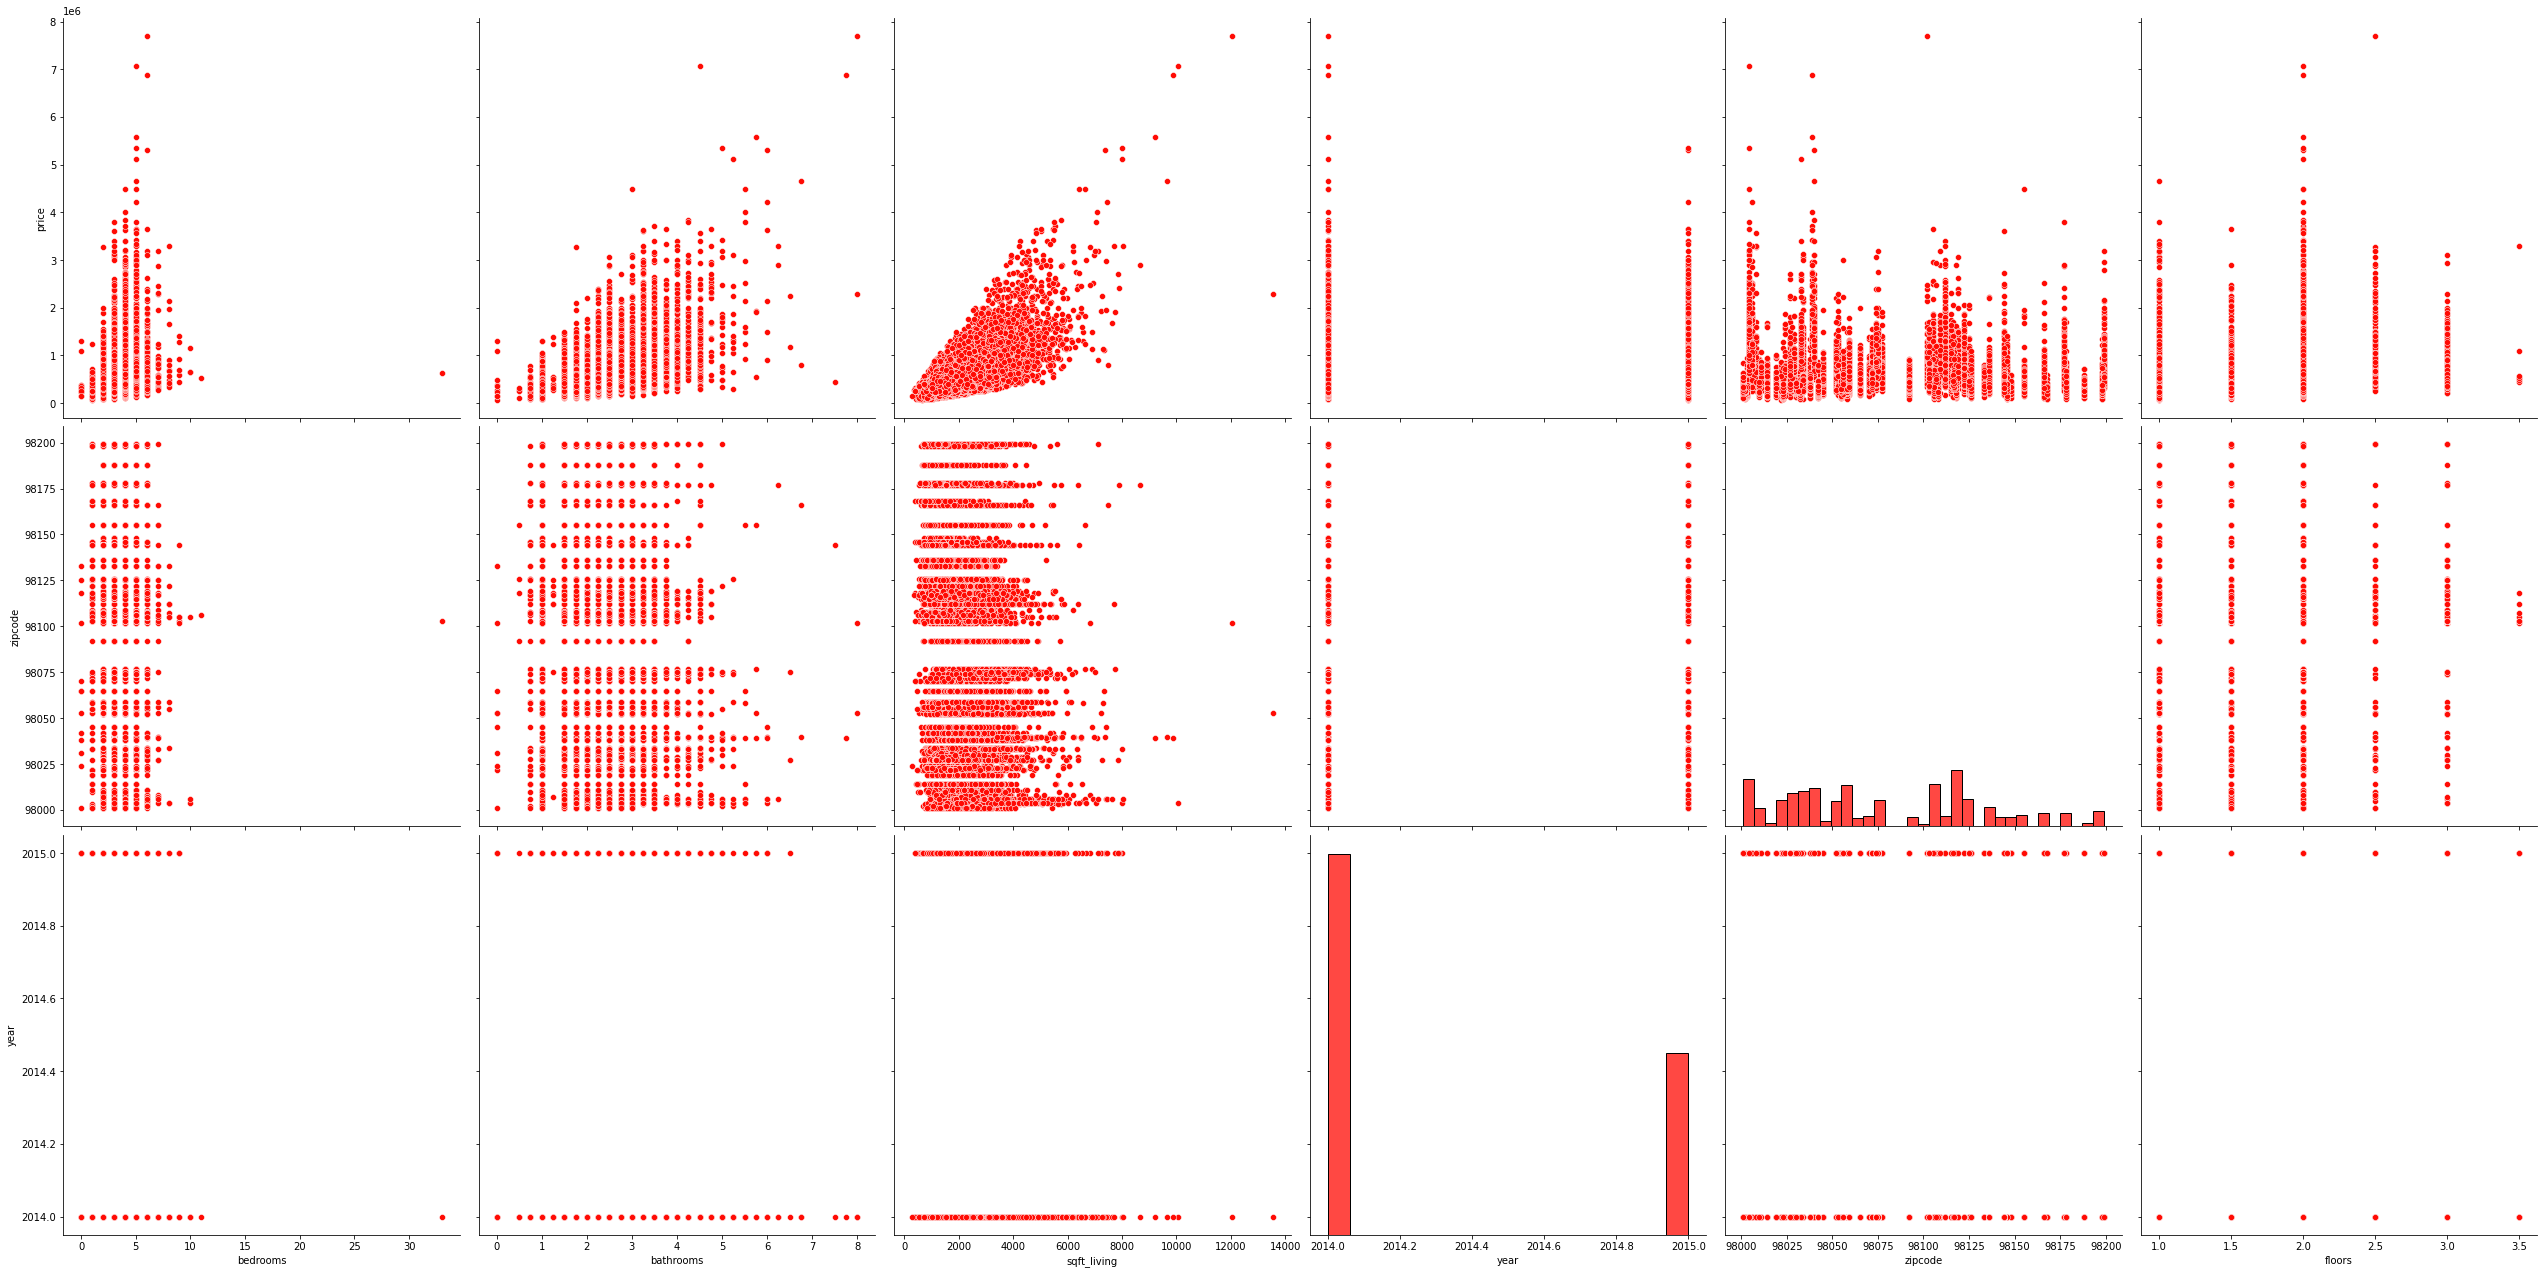

In [8]:
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors)) ##Creating pallettes 
sns.pairplot(data=df,
             y_vars=['price', 'zipcode', 'year'],
             x_vars=['bedrooms', 'bathrooms', 'sqft_living','year','zipcode','floors',], 
             size=6)


<AxesSubplot:xlabel='zipcode', ylabel='Count'>

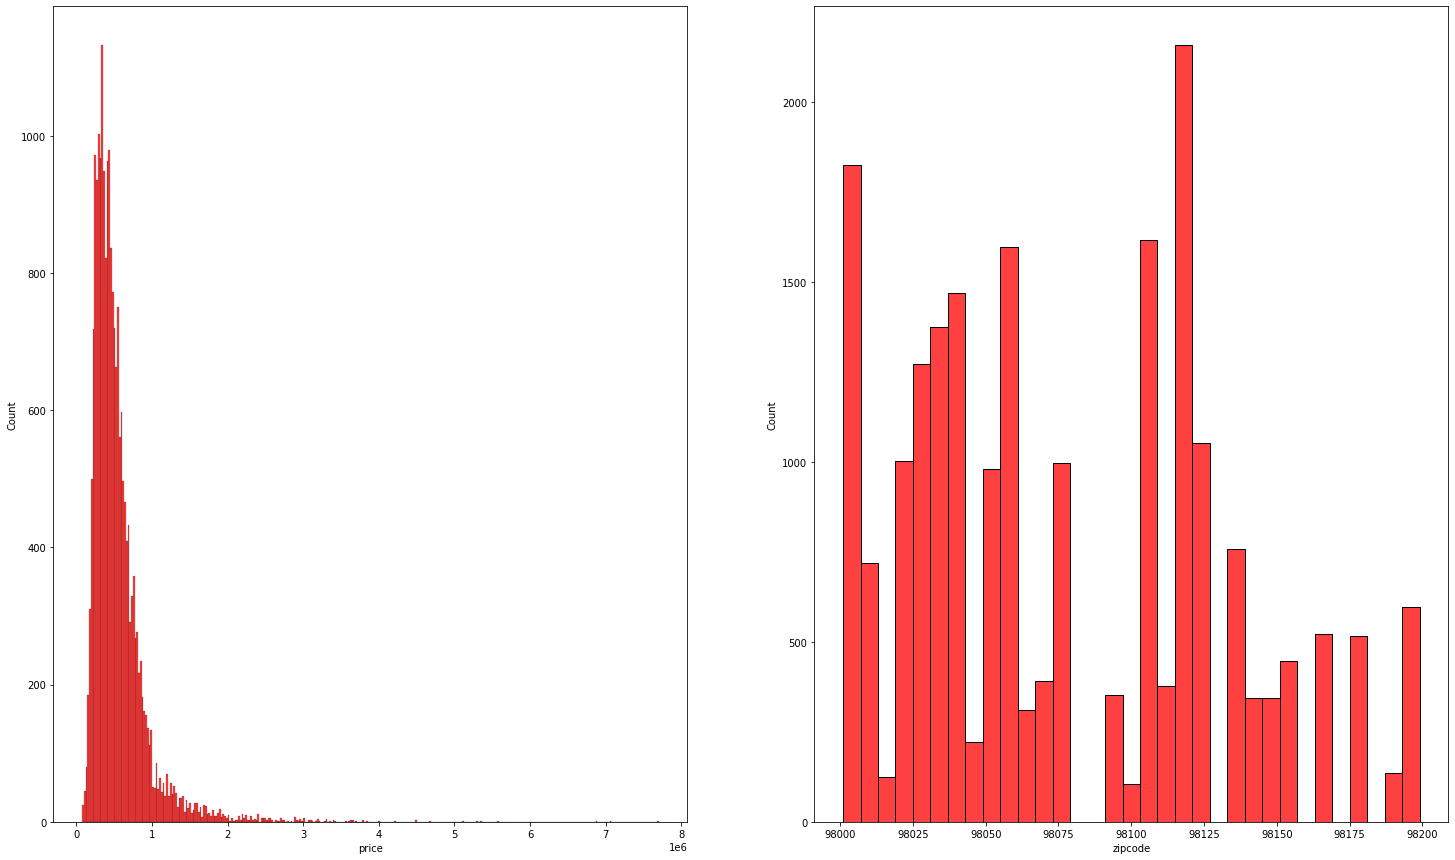

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(25, 15)) ##Creating new histograms to see price and zipcode values 
sns.histplot(ax=axes[0],data=df, x="price",color= 'red')
sns.histplot(ax=axes[1],data=df, x="zipcode",color='red')

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

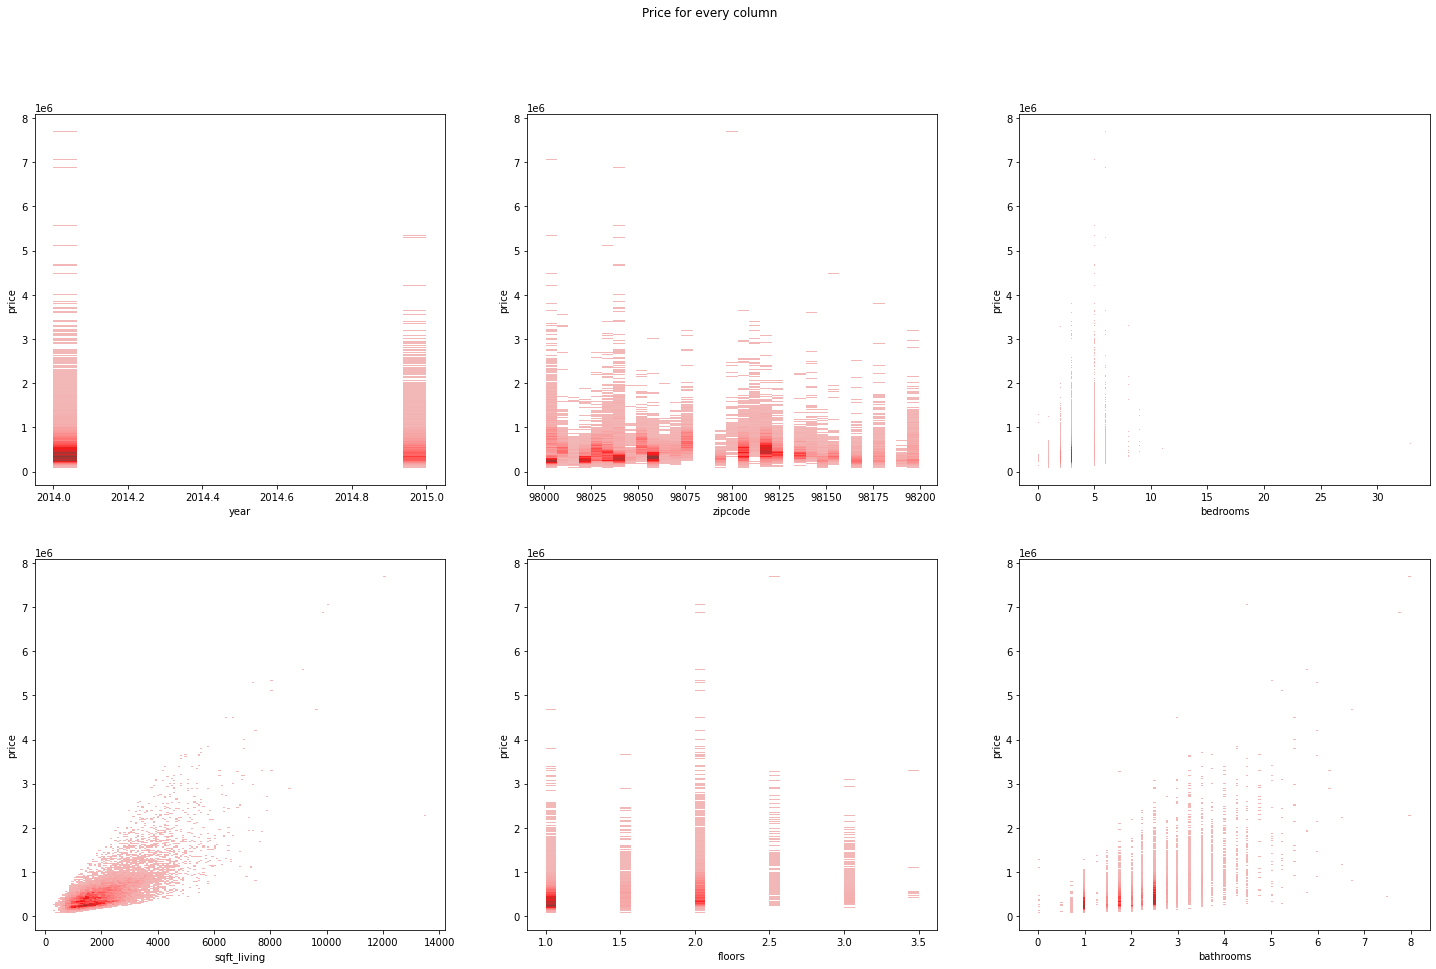

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15)) ##Creating more histograms to analyse data easly 

fig.suptitle('Price for every column')

sns.histplot(ax=axes[0,0], data=df, x='year', y='price',color= 'red')
sns.histplot(ax=axes[0,1], data=df, x='zipcode', y='price',color= 'red')
sns.histplot(ax=axes[0,2], data=df, x='bedrooms', y='price',color= 'red')
sns.histplot(ax=axes[1,0], data=df, x='sqft_living', y='price',color= 'red')
sns.histplot(ax=axes[1,1], data=df, x='floors', y='price',color= 'red')
sns.histplot(ax=axes[1,2], data=df, x='bathrooms', y='price',color= 'red')


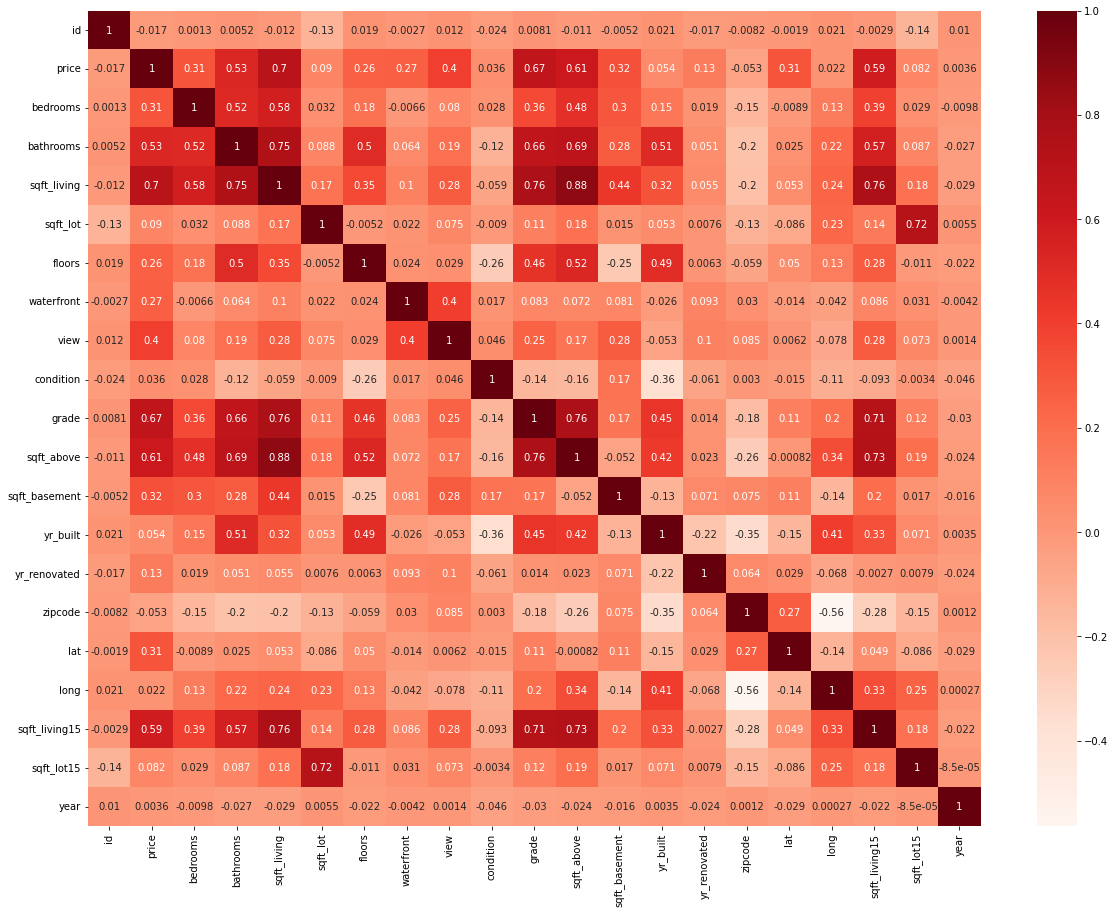

In [11]:
cor = df.corr() ##Corr for every data column 
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [12]:
most_expensive_house = df.price.idxmax()
latitude = df.lat[most_expensive_house]
longitude = df.long[most_expensive_house]

In [13]:
most_cheap_house = df.price.idxmin()
latitude2 = df.lat[most_cheap_house]
longitude2 = df.long[most_cheap_house]

In [14]:

folium_map = folium.Map(location=[latitude, longitude], zoom_start=20)
base_map = folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = True,
        control = True
    )
base_map.add_to(folium_map)
folium.Circle(
    radius=50,
    location=[latitude, longitude],
    color="lightblue",
    fill=True,
).add_to(folium_map)
folium.Circle(
    radius=50,
    location=[latitude2, longitude2],
    color="lightblue",
    fill=True,
).add_to(folium_map)
folium_map

# Data Anaylsis

**Min Value**

In [15]:
print('This is your Min Value for Price' ,df['price'].min(),'$') #Min Value

This is your Min Value for Price 75000.0 $


**Max Value**

In [16]:
print('This is your Max Value for Price' ,df['price'].max(),'$')  #Max Value

This is your Max Value for Price 7700000.0 $


**Mean Value**

In [17]:
print('This is your Mean Value for Price' , round(df['price'].mean()),'$')  #Mean Value

This is your Mean Value for Price 540088 $


**Mean Value for zipcode**

In [18]:
dprice = df[['zipcode','price']].astype(float) 

In [19]:
dmean_prices = dprice.groupby(['zipcode', 'price']).sum().reset_index().groupby('zipcode').mean().round()
dmean_prices.sort_values(by='price',ascending = False)

,price
zipcode,
98039.0,2170840.0
98004.0,1429689.0
98040.0,1226519.0
98112.0,1110574.0
98102.0,943845.0
...,...
98188.0,291889.0
98148.0,286344.0
98032.0,254979.0


**Selecting the houses that have ‘sqft_living’ higher than 2000 sqft but not larger than 4000 
sqft**

In [20]:
dx = df[df['sqft_living'].between(2000, 4000)]
mean_value = round((len(dx)/len(df))*100)
mean_value #Percentage of higher than 2000 sqft but not larger than 4000 sqft houses

43

In [21]:
house2 = df[df['id']== 1925069082]
house2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
1361,1925069082,2200000.0,5,4.25,4640,22703,2.0,1,4,5,...,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200,2015


In [22]:
house2 = df[df['id']== 1925069082]
house2.drop(['id','price','year'], axis = 1, inplace = True)
house2

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [23]:
house1 = df[df['id']== 5309101200]
house1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
1054,5309101200,620000.0,4,2.25,2400,5350,1.5,0,0,4,...,1460,940,1929,0,98117,47.6763,-122.37,1250,4880,2014


In [24]:
house1.drop(['id','price','year'], axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Lineer Regresion With one Feature

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
living_space = df['sqft_living']
price = df['price']

In [27]:
x = living_space.values.reshape(-1,1)
y = price.values.reshape(-1,1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)

In [29]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [30]:
predictor = regressor.predict(x_test)
predictor

array([[645163.4661418 ],
       [620065.95503552],
       [539196.19702639],
       ...,
       [441594.7649464 ],
       [238026.06375099],
       [238026.06375099]])

In [31]:
from sklearn import metrics

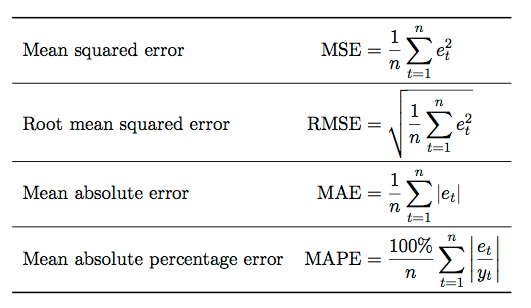

Text(0, 0.5, 'Price')

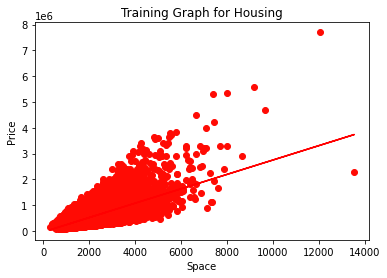

In [32]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train), color='red')
plt.title('Training Graph for Housing')
plt.xlabel('Space')
plt.ylabel('Price')

In [33]:
model_score = regressor.score(x_test,y_test)
r_square = metrics.r2_score(y_test, predictor)
mse = metrics.mean_squared_error(y_test, predictor)
mae = metrics.median_absolute_error(y_test, predictor)
ev = metrics.explained_variance_score(y_test, predictor)

print("Model Score    : ", model_score*100)
print("R Square       : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score    :  48.293699754345575
R Square       :  48.293699754345575
Mean Squared Error     :  70690202583.65173
Root Mean Squared Error:  265876.29187961033
Median Absolute Error  :  129477.85722271085
Explained Variance     :  0.4829926945396297


**The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed**

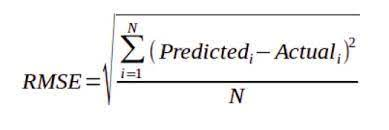

In [34]:
regressor.predict(house2.sqft_living.values.reshape(-1,1))

array([[1253080.95738287]])

In [35]:
regressor.predict(house1.sqft_living.values.reshape(-1,1))

array([[628431.79207095]])

# Linear Regression with multiple feature

In [36]:
advanced_features = [ 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode', 'condition', 'grade', 'waterfront','view', 'sqft_above','sqft_basement','yr_built', 'yr_renovated','lat', 'long', 'sqft_living15',  'sqft_lot15'] 


In [37]:
data = df[advanced_features]
price = df['price']

In [38]:
x = data.values.reshape(-1,18)
y = price.values.reshape(-1,1)

In [39]:
x

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8,random_state = 0)

In [41]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [42]:
predictor = regressor.predict(x_test)
predictor

array([[ 389394.85651544],
       [1478827.75859303],
       [ 523279.45533706],
       ...,
       [ 664687.85492949],
       [ 192975.81785888],
       [ 277455.88920438]])

In [43]:
dtemp2 = pd.DataFrame(data = regressor.coef_, columns=advanced_features)
dtemp2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,-19125.692447,37832.934506,94.609264,0.283109,15749.126352,-477.808914,24602.414482,93460.669888,706817.61076,63149.215574,61.441653,33.167611,-2444.69928,24.335555,618419.119635,-201981.442719,29.025677,-0.522965


Text(0, 0.5, 'Price')

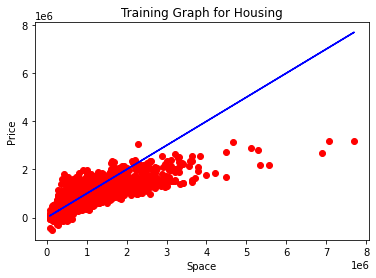

In [44]:
predictArray_lin = regressor.predict(x)
plt.scatter(y,predictArray_lin, color="red")
plt.plot(y,y, color="blue")
plt.title('Training Graph for Housing')
plt.xlabel('Space')
plt.ylabel('Price')

In [45]:
model_score = regressor.score(x_test,y_test)
r_square = metrics.r2_score(y_test, predictor)
mse = metrics.mean_squared_error(y_test, predictor)
mae = metrics.median_absolute_error(y_test, predictor)
ev = metrics.explained_variance_score(y_test, predictor)

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  69.0385431217199
R Square               :  69.0385431217199
Mean Squared Error     :  42485941297.335785
Root Mean Squared Error:  206121.18109824567
Median Absolute Error  :  86778.76471959846
Explained Variance     :  0.6903996710882714


In [46]:
house2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [47]:
x = regressor.predict(house2.values.reshape(-1,18))
round(x[0][0])

241025638

In [48]:
x = regressor.predict(house1.values.reshape(-1,18))
round(x[0][0])

151414520

# Normalization

In [49]:
dprice = df['price']
dprice
data = df[advanced_features]

In [50]:
from sklearn.preprocessing import MinMaxScaler
'''
scaler = MinMaxScaler()
scaler.fit(df[advanced_features])
scaler.transform(data[advanced_features])
dtemp = scaler.transform(data[advanced_features])
dtemp = pd.DataFrame(dtemp)
'''
dtemp = pd.DataFrame(data)

In [51]:
dtemp

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,98178,3,7,0,0,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,98125,3,7,0,0,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,98028,3,6,0,0,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,98136,5,7,0,0,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,98074,3,8,0,0,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,98103,3,8,0,0,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,98146,3,8,0,0,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,98144,3,7,0,0,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,98027,3,8,0,0,1600,0,2004,0,47.5345,-122.069,1410,1287


# 2.degree

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [53]:
x = dtemp.iloc[:,:]
y = df.price
X = x.values
Y = y.values

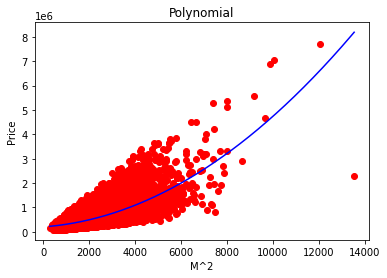

In [54]:
#from sklearn.preprocessing import PolynimalRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(df['sqft_living'].values.reshape(-1, 1))
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
X = df.sqft_living
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("Polynomial")
plt.xlabel('M^2')
plt.ylabel('Price')
plt.show()


In [55]:
fittedParameters = np.polyfit(X, y, 2)
print('Fitted Parameters:', fittedParameters)
modelPredictions = np.polyval(fittedParameters, X)

Fitted Parameters: [3.85812609e-02 6.79940947e+01 1.99222279e+05]


In [56]:
modelPredictions = np.polyval(fittedParameters, house2['sqft_living'])
modelPredictions

array([1345353.99412115])

In [57]:
modelPredictions = np.polyval(fittedParameters, house1['sqft_living'])
modelPredictions

array([584636.16954967])

# 5.Degree 1 Feature  

In [58]:
fittedParameters = np.polyfit(X, y, 5)
print('Fitted Parameters:', fittedParameters)
modelPredictions = np.polyval(fittedParameters, X)

Fitted Parameters: [-2.78879565e-13  7.03084681e-09 -6.19444939e-05  2.83142175e-01
 -3.60310625e+02  4.58058550e+05]


In [59]:
modelPredictions = np.polyval(fittedParameters, house1['sqft_living'])
modelPredictions

array([578951.78663787])

In [60]:
modelPredictions = np.polyval(fittedParameters, house2['sqft_living'])
modelPredictions

array([1353228.37907699])

# 3.Degree Multiple Feature

In [61]:
x = dtemp.iloc[:,:]
y = df.price
X = x.values
Y = y.values

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pre_process = PolynomialFeatures(degree=3)
X_poly = pre_process.fit_transform(X)
X_poly


array([[1.00000000e+00, 3.00000000e+00, 1.00000000e+00, ...,
        1.01451400e+10, 4.27761500e+10, 1.80362125e+11],
       [1.00000000e+00, 3.00000000e+00, 2.25000000e+00, ...,
        2.18177479e+10, 9.86188025e+10, 4.45768658e+11],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        5.96459008e+10, 1.76788696e+11, 5.23996494e+11],
       ...,
       [1.00000000e+00, 2.00000000e+00, 7.50000000e-01, ...,
        2.08808280e+09, 4.10860998e+09, 8.08429434e+09],
       [1.00000000e+00, 3.00000000e+00, 2.50000000e+00, ...,
        2.55868470e+09, 2.33548029e+09, 2.13174690e+09],
       [1.00000000e+00, 2.00000000e+00, 7.50000000e-01, ...,
        1.41182280e+09, 1.87827798e+09, 2.49884629e+09]])

In [63]:
pr_model = LinearRegression()
pr_model.fit(X_poly, Y)
y_pred = pr_model.predict(X_poly)

y_new = pr_model.predict(pre_process.fit_transform(house1.values))
y_new

array([-2.35571708e+13])

In [64]:
y_new = pr_model.predict(pre_process.fit_transform(house2.values))
y_new

array([-3.11502666e+13])

# 3.Degree

In [65]:
x = dtemp.sqft_living
y = df.price
X = x.values.reshape(-1,1)
Y = y.values

In [66]:
pre_process = PolynomialFeatures(degree=3)
X_poly = pre_process.fit_transform(X)
X_poly

array([[1.0000000e+00, 1.1800000e+03, 1.3924000e+06, 1.6430320e+09],
       [1.0000000e+00, 2.5700000e+03, 6.6049000e+06, 1.6974593e+10],
       [1.0000000e+00, 7.7000000e+02, 5.9290000e+05, 4.5653300e+08],
       ...,
       [1.0000000e+00, 1.0200000e+03, 1.0404000e+06, 1.0612080e+09],
       [1.0000000e+00, 1.6000000e+03, 2.5600000e+06, 4.0960000e+09],
       [1.0000000e+00, 1.0200000e+03, 1.0404000e+06, 1.0612080e+09]])

In [67]:
pr_model = LinearRegression()
pr_model.fit(X_poly, Y)
y_pred = pr_model.predict(X_poly)

y_new = pr_model.predict(pre_process.fit_transform(house1.sqft_living.values.reshape(1,-1)))
y_new

array([568679.07255066])

In [68]:
y_new = pr_model.predict(pre_process.fit_transform(house2.sqft_living.values.reshape(1,-1)))
y_new

array([1408790.84460339])